In [18]:
import numpy as np
import matplotlib.pyplot as plt
import argparse
import math
import pandas as pd
import os

def fit(X_train, Y_train, k):
        """
        Fits the polynomial regression model to the training data.

        Arguments
        ----------
        X: nxp matrix of n examples with p independent variables
        y: response variable vector for n examples
        alpha: regularization parameter.
        """
       	# Your code here
        # calculate w
        phi = np.ones((X_train.shape[0], k+1))
        for i in range(k+1):
            phi[:, i] = np.power(X_train, i)
        w = np.linalg.inv((phi.T).dot(phi)).dot(phi.T).dot(Y_train)
        return w

def validate(X_val, Y_val, w):
        """
        Returns the RMSE(Root Mean Squared Error) when the model is validated.

        Arguments
        ----------
        X: nxp matrix of n examples with p covariates
        y: response variable vector for n examples

        Returns
        ----------
        RMSE when model is used to predict y
        """
       	# Your code here
        rs = 0
        X_power = np.ones((X_val.shape[0], w.shape[0]))
        for i in range(w.shape[0]):
            X_power[:, i] = np.power(X_val, i)
        for i in range(X_power.shape[0]):
            rs = rs + (X_power[i, :].dot(w.T) - Y_val[i])**2
        return rs

Text(0, 0.5, '$training$ $error$')

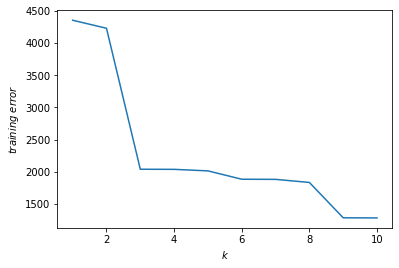

In [20]:
path = "/Users/muzo01/Cpp_projects/poly_reg_data.csv"

data = np.genfromtxt(path, delimiter=',')

#Parse training dataset
X_train = data[1:26, 0]
y_train = data[1:26, 1]

#Parse validation set
X_val = data[26:41, 0]
y_val = data[26:41, 1]

#training error
error = np.zeros(10)
for k in range(10):
    w = fit(X_train, y_train, k+1)
    rs = validate(X_train, y_train, w)
    error[k] = rs
plt.plot(range(1, 11), error)
plt.xlabel(r"$k$")
plt.ylabel(r"$training$ $error$")

As we could seen from the plot, when k = 9, 10 we could acquire the minimized error.

Text(0, 0.5, '$validation$ $error$')

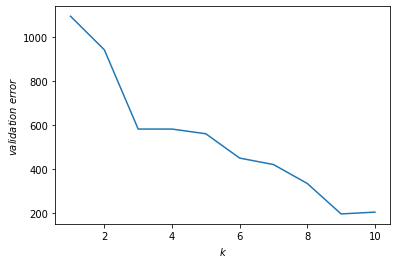

In [21]:
#validation error
error = np.zeros(10)
for k in range(10):
    w = fit(X_val, y_val, k+1)
    rs = validate(X_val, y_val, w)
    error[k] = rs
plt.plot(range(1, 11), error)
plt.xlabel(r"$k$")
plt.ylabel(r"$validation$ $error$")

We could tell from the plot that when k = 9 we could acquire the minimized error.

The optimum k values are different, the difference may come from the difference between training and validation datasets.

Text(0, 0.5, '$y$')

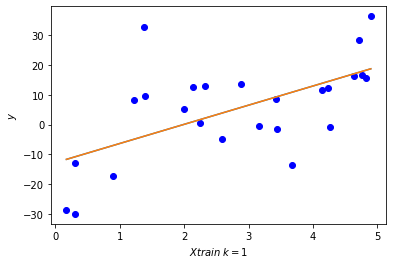

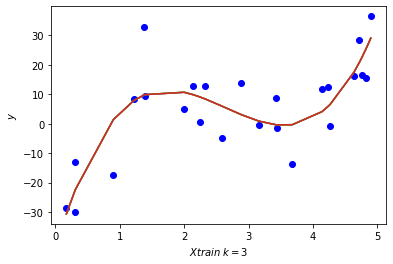

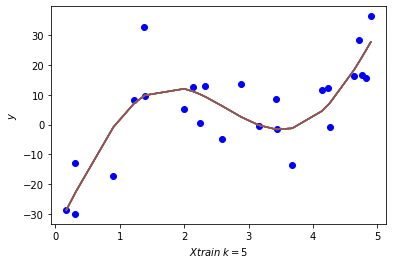

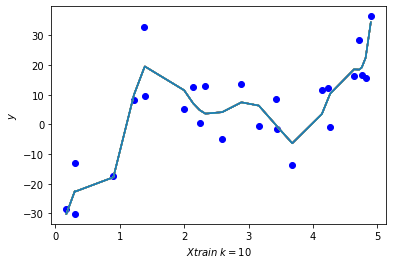

In [26]:
w = fit(X_train, y_train, 1)
reg = np.zeros((X_train.shape[0], w.shape[0]))
X_p = np.zeros((X_train.shape[0], w.shape[0]))
for i in range(w.shape[0]):
    X_p[:, i] = np.power(X_train, i)
for i in range(X_p.shape[0]):
    reg[i] = (X_p[i, :].dot(w.T))

plt.figure(1)
plt.plot(X_train, y_train, 'bo')
xs, ys = zip(*sorted(zip(X_train, reg)))
#xnew = np.linspace(xs.min(), xs.max(), 300)
#ysmooth = spline(T, power, xnew)
plt.plot(xs, ys)
plt.xlabel(r"$Xtrain$ $k = 1$")
plt.ylabel(r"$y$")

w = fit(X_train, y_train, 3)
reg = np.zeros((X_train.shape[0], w.shape[0]))
X_p = np.zeros((X_train.shape[0], w.shape[0]))
for i in range(w.shape[0]):
    X_p[:, i] = np.power(X_train, i)
for i in range(X_p.shape[0]):
    reg[i] = (X_p[i, :].dot(w.T))
    
plt.figure(2)
plt.plot(X_train, y_train, 'bo')
xs, ys = zip(*sorted(zip(X_train, reg)))
#xnew = np.linspace(xs.min(), xs.max(), 300)
#ysmooth = spline(T, power, xnew)
plt.plot(xs, ys)
plt.xlabel(r"$Xtrain$ $k = 3$")
plt.ylabel(r"$y$")

w = fit(X_train, y_train, 5)
reg = np.zeros((X_train.shape[0], w.shape[0]))
X_p = np.zeros((X_train.shape[0], w.shape[0]))
for i in range(w.shape[0]):
    X_p[:, i] = np.power(X_train, i)
for i in range(X_p.shape[0]):
    reg[i] = (X_p[i, :].dot(w.T))

plt.figure(3)
plt.plot(X_train, y_train, 'bo')
xs, ys = zip(*sorted(zip(X_train, reg)))
#xnew = np.linspace(xs.min(), xs.max(), 300)
#ysmooth = spline(T, power, xnew)
plt.plot(xs, ys)
plt.xlabel(r"$Xtrain$ $k = 5$")
plt.ylabel(r"$y$")

w = fit(X_train, y_train, 10)
reg = np.zeros((X_train.shape[0], w.shape[0]))
X_p = np.zeros((X_train.shape[0], w.shape[0]))
for i in range(w.shape[0]):
    X_p[:, i] = np.power(X_train, i)
for i in range(X_p.shape[0]):
    reg[i] = (X_p[i, :].dot(w.T))

plt.figure(4)
plt.plot(X_train, y_train, 'bo')
xs, ys = zip(*sorted(zip(X_train, reg)))
#xnew = np.linspace(xs.min(), xs.max(), 300)
#ysmooth = spline(T, power, xnew)
plt.plot(xs, ys)
plt.xlabel(r"$Xtrain$ $k = 10$")
plt.ylabel(r"$y$")